In [21]:
import sys
import random
from math import floor, log10, sqrt
import copy
import csv

# Q1) Gram-Schmidt Algorithm and QR decomposition

i) Write a code to generate a random matrix A of size m × n with m > n and calculate its Frobenius norm, ∥ · ∥F . The entries of A must be of the form r.dddd (example 5.4316). The inputs are the positive integers m and n and the output should display the the dimensions and the calculated norm value.

                       Deliverable(s) : The code with the desired input and output (0.5)
-----------------------------------------------------------------------------------------------------------------------

In [2]:
# Significant digit conversion
def tidy(x, sig):
    y = abs(x)
    if y <= sys.float_info.min:
        return 0.0000
    return round(x, sig-int(floor(log10(y)))-1)

In [237]:
# Calculate frobenius norm of matrix m
def norm_frobenius(m):
    sqr_sum = 0
    for r in range(len(m)):
        for c in range(len(m[r])):
            elm = abs(m[r][c])
            sqr_sum = sqr_sum + (elm ** 2)
    return sqrt(sqr_sum)

In [4]:
# Matrix generator of size m x n
def generate_matrix(m, n, low_num=0.10000, up_num=9.9999, sig=5):
    return [[tidy(random.uniform(low_num, up_num), sig) for i in range(n)] for j in range(m)]

In [5]:
# Function to run frobenius norm calculator along with matrix generation
def run_frobenius_calc(m, n):
    if m >= n:
        a = generate_matrix(m, n)
        print(f"\nMatrix size: {m}x{n}")
        frobenius_norm_val = tidy(norm_frobenius(a), 5)
        print(f"\nFrobenius norm value: {frobenius_norm_val}")
    else:
        print(f"\nPlease provide matrix size, where m > n.")

In [6]:
# Test run
run_frobenius_calc(5, 4)


Matrix size: 5x4

Frobenius norm value: 25.742


ii) Write a code to decide if Gram-Schmidt Algorithm can be applied to columns of a given matrix A through calculation of rank. The code should print appropriate messages indicating whether Gram-Schmidt is applicable on columns of the matrix or not.

                      Deliverable(s) : The code that performs the test. (1)
-----------------------------------------------------------------------------------------------------------------------

In [15]:
def is_full_rank_matrix(matrix, d=5):
    r = len(matrix)
    c = len(matrix[0])
    
    # Significant digit conversion
    def tidy(x, sig):
        y = abs(x)
        if y <= sys.float_info.min:
            return 0.0000
        return round(x, sig-int(floor(log10(y)))-1)
         
    # Function for exchanging two rows of a matrix
    def swap(matrix, row1, row2, col):
        for i in range(col):
            temp = matrix[row1][i]
            matrix[row1][i] = matrix[row2][i]
            matrix[row2][i] = temp
             
    rank = c
    for row in range(0, rank, 1):
        # Diagonal element is not zero
        if matrix[row][row] != 0:
            for col in range(0, r, 1):
                if col != row:
                    multiplier = (matrix[col][row] / matrix[row][row])
                    for i in range(rank):
                        matrix[col][i] -= (multiplier * matrix[row][i])
        else:
            reduce = True
            for i in range(row + 1, r, 1):
                if matrix[i][row] != 0:
                    swap(matrix, row, i, rank)
                    reduce = False
                    break
            if reduce:
                rank -= 1
                for i in range(0, r, 1):
                    matrix[i][row] = matrix[i][rank]
            row -= 1
    return True if rank == min(r, c) else False

In [16]:
def gram_schmidt_applicability_calc(m):
    check = is_full_rank_matrix(m)
    if check:
        print("\nGram-Schmidt is applicable on columns of the matrix.")
    else:
        print("\nGram-Schmidt is not applicable on columns of the matrix")

In [17]:
# Test1
a = [[2.0,  1.0, -1.0],
     [-3.0,  -1.0,  2.0],
     [-2.0, 1.0,  2.0]]
gram_schmidt_applicability_calc(a)


Gram-Schmidt is applicable on columns of the matrix.


In [18]:
# Test2
a = [[3, 2, 4],
     [-1, 1, 2],
     [9, 5, 10]]
gram_schmidt_applicability_calc(a)


Gram-Schmidt is not applicable on columns of the matrix


iii) Write a code to generate the orthogonal matrix Q from a matrix A by performing the Gram-Schmidt orthogonalization method. Ensure that A has linearly independent columns by checking the rank. Keep generating A until the linear independence is obtained.

                         Deliverable(s) : The code that produces matrix Q from A (1)
                         
-----------------------------------------------------------------------------------------------------------------------

##### Ref: https://rpubs.com/aaronsc32/qr-decomposition-gram-schmidt

In [73]:
def is_full_rank_matrix(matrix, d=5):
    r = len(matrix)
    c = len(matrix[0])
    
    # Significant digit conversion
    def tidy(x, sig):
        y = abs(x)
        if y <= sys.float_info.min:
            return 0.0000
        return round(x, sig-int(floor(log10(y)))-1)
         
    # Function for exchanging two rows of a matrix
    def swap(matrix, row1, row2, col):
        for i in range(col):
            temp = matrix[row1][i]
            matrix[row1][i] = matrix[row2][i]
            matrix[row2][i] = temp
             
    rank = c
    for row in range(0, rank, 1):
        # Diagonal element is not zero
        if matrix[row][row] != 0:
            for col in range(0, r, 1):
                if col != row:
                    multiplier = (matrix[col][row] / matrix[row][row])
                    for i in range(rank):
                        matrix[col][i] -= (multiplier * matrix[row][i])
        else:
            reduce = True
            for i in range(row + 1, r, 1):
                if matrix[i][row] != 0:
                    swap(matrix, row, i, rank)
                    reduce = False
                    break
            if reduce:
                rank -= 1
                for i in range(0, r, 1):
                    matrix[i][row] = matrix[i][rank]
            row -= 1
    return True if rank == min(r, c) else False

In [74]:
def get_matrix_column(matrix, col):
    column = []
    for row in matrix:
        elem = row[col]
        column.append(elem)
    return column

In [125]:
def set_matrix_column(matrix, n, col_idx, col):
    for row_idx in range(n):
        matrix[row_idx][col_idx] = col[row_idx]
    return matrix

In [126]:
def inner_dot(x, y):
    return sum(x_i * y_i for x_i, y_i in zip(x, y))

In [203]:
def gram_schmidt(matrix, m, n, d=5):
    # Initialize Q and R matrices
    q = [[0 for x in range(n)] for y in range(m)]
    r = [[0 for x in range(n)] for y in range(n)]
    for j in range(n):
        # Step-1, v1 = a1
        v = get_matrix_column(matrix, j)
        # Skip the first column
        if j > 0:
            for i in range(j):
                # Find the inner product
                r[i][j] = inner_dot(get_matrix_column(q, i), get_matrix_column(matrix, j))
                # Subtract the projection from v which causes v to become perpendicular to all columns of Q
                v = [x_i - y_i for x_i, y_i in zip(v, [r[i][j] * x for x in get_matrix_column(q, i)])]
        # Find the L2 norm of the jth diagonal of R
        r[j][j] = sqrt(sum([x**2 for x in v]))
        # The orthogonalized result is found and stored in the ith column of Q.
        q = set_matrix_column(q, n, j, [x / r[j][j] for x in v])
    return (q, r)

In [204]:
# Matrix generator of size m x n
def generate_matrix(m, n, low_num=0.10000, up_num=9.9999, sig=5):
    return [[tidy(random.uniform(low_num, up_num), sig) for i in range(n)] for j in range(m)]

In [205]:
def run_gram_schmidt_calc(m=3, n=3, max_itr=100):
    itr = 1
    while True and itr <= max_itr:
        print(f"\nGram-Schmidt Calculation Iteration: {itr}")
        matrix = generate_matrix(m,n)
        matrix_ = copy.deepcopy(matrix)
        if is_full_rank_matrix(matrix_):
            q, r = gram_schmidt(matrix, m, n)
            print(f"\nQ: \n{q}\n\nR: \n{r}")
            break
        else:
            print("\nGram-Schmidt is not applicable as generated Matrix does not have linearly independent columns.")

In [206]:
# Test1
run_gram_schmidt_calc()


Gram-Schmidt Calculation Iteration: 1

Q: 
[[0.11931715970462617, 0.3331470481044053, 0.9352948517656569], [0.21661534929582182, 0.9105961807368902, -0.3519835025634553], [0.9689381847411473, -0.24459689279855906, -0.03648498573139851]]

R: 
[[8.30919879801296, 5.178583720405156, 8.684894632952727], [0, 8.820747822648299, 1.6726892806609128], [0, 0, 2.447347528421533]]


In [207]:
# Test2
A = [[2, -2, 18], [2, 1, 0], [1, 2, 0]]

A_ = copy.deepcopy(A)
if is_full_rank_matrix(A_):
    q, r = gram_schmidt(A, 3, 3)
    print(f"\nQ: \n{q}\n\nR: \n{r}")


Q: 
[[0.6666666666666666, -0.6666666666666666, 0.3333333333333333], [0.6666666666666666, 0.3333333333333333, -0.6666666666666666], [0.3333333333333333, 0.6666666666666666, 0.6666666666666666]]

R: 
[[3.0, 0.0, 12.0], [0, 3.0, -12.0], [0, 0, 6.0]]


iv) Write a code to create a QR decomposition of the matrix A by utilizing the code developed in the previous sub-parts of this question. Find the matrices Q and R and then display the value ∥A − (Q.R)∥F , where ∥ · ∥F is the Frobenius norm. The code should also display the total number of additions, multiplications and divisions to find the result.

                 Deliverable(s) : The code with the said input and output. The results obtained for A 
                      generated with m = 7 and n = 5 with random entries described above. (2.5)
                      
-----------------------------------------------------------------------------------------------------------------------

###### Ref: http://linear.ups.edu/scla/html/section-QR.html

In [217]:
def gram_schmidt(matrix, m, n, d=5):
    n_add, n_mul, n_div = 0, 0, 0
    # Initialize Q and R matrices
    q = [[0 for x in range(n)] for y in range(m)]
    r = [[0 for x in range(n)] for y in range(n)]
    for j in range(n):
        # Step-1, v1 = a1
        v = get_matrix_column(matrix, j)
        # Skip the first column
        if j > 0:
            for i in range(j):
                # Find the inner product
                r[i][j] = inner_dot(get_matrix_column(q, i), get_matrix_column(matrix, j))
                n_add = n_add + m - 1
                n_mul = n_mul + m
                # Subtract the projection from v which causes v to become perpendicular to all columns of Q
                v = [x_i - y_i for x_i, y_i in zip(v, [r[i][j] * x for x in get_matrix_column(q, i)])]
                n_mul = n_mul + m
                n_add = n_add + m - 1
        # Find the L2 norm of the jth diagonal of R
        r[j][j] = sqrt(sum([x**2 for x in v]))
        n_mul = n_mul + m + 1
        n_add = n_add + m - 1
        # The orthogonalized result is found and stored in the ith column of Q.
        q = set_matrix_column(q, n, j, [x / r[j][j] for x in v])
        n_div = n_div + m
    return (q, r, n_add, n_mul, n_div)

In [12]:
def get_matrix_multiplication(mat1, mat2):
    result = [[sum(a * b for a, b in zip(mat1_row, mat2_col)) for mat2_col in zip(*mat2)] for mat1_row in mat1]
    return result

In [235]:
def get_matrix_subtraction(mat1, mat2):
    result = [[mat1[m][n] - mat2[m][n] for n in range(len(mat1[0]))] for m in range(len(mat1))]
    return result

In [240]:
def run_gram_schmidt_calc(m=7, n=5, max_itr=100):
    itr = 1 # Iteration for if randomaly generated matrices are not linearly independent than stop at 100th Itr
    while True and itr <= max_itr:
        print(f"\nGram-Schmidt Calculation Iteration: {itr}")
        matrix = generate_matrix(m,n)
        # Check if matrix has independent columns by checking full rank matrix
        #matrix_ = [[0 for x in range(n)] for y in range(m)]
        #for col_idx in range(n):
        #    for row_idx in range(m):
        #        matrix_[row_idx][col_idx] = matrix[col_idx][row_idx]
        matrix_ = copy.deepcopy(matrix)
        a_ = copy.deepcopy(matrix)
        if is_full_rank_matrix(matrix_):
            q, r, n_add, n_mul, n_div = gram_schmidt(matrix, m, n)
            qr = get_matrix_multiplication(q, r)
            a_minus_qr = get_matrix_subtraction(a_, qr)
            f_norm_of_a_minus_qr = norm_frobenius(a_minus_qr)
            print(f"\nQ: \n{q}\n\nR: \n{r}")
            print(f"\nNo. of Addition: {n_add}\nNo. of Multiplication: {n_mul}\nNo. of Division: {n_div}")
            print(f"\nFrobenius Norm of A - QR: {f_norm_of_a_minus_qr}")
            break
        else:
            print("\nGram-Schmidt is not applicable as generated Matrix does not have linearly independent columns.")

In [241]:
run_gram_schmidt_calc()


Gram-Schmidt Calculation Iteration: 1

Q: 
[[0.13074854983604806, 0.5210906745104166, -0.05021583636884551, 0.4744772191448685, 0.05486475659279684], [0.4463262232517822, -0.19746237185617072, 0.1473283903666262, 0.44979818419454315, 0.12242959599365119], [0.5017198949284944, 0.2536321741291284, -0.14299281275494488, 0.001274668957769994, -0.18662694997769733], [0.5070464131570142, -0.036367891603072085, 0.3409665640553965, -0.24898422433612696, 0.03388146738985324], [0.17889900388193053, 0.3940493421924767, 0.009324629861261093, -0.2102749474973663, 0.33110346180176825], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

R: 
[[18.886633948112618, 9.505737191350658, 9.051172259685956, 8.990739743593588, 7.888032054271255], [0, 14.492177689043167, 0.22039014110326516, 5.283846078527052, 5.1642076560882195], [0, 0, 13.352777590480402, 0.4250786113566184, 1.6393124186731112], [0, 0, 0, 12.785137689914155, 2.5455020463147964], [0, 0, 0, 0, 12.872881477872372]]

No. of Addition: 150
No. of Multiplication:

# Q2) Gradient Descent Algorithm

i) Consider the last 4 digits of your mobile number (Note : In case there is a 0 in one of the digits replace it by 3). Let it be n1n2n3n4. Generate a random matrix A of size n1n2 × n3n4. For example, if the last four digits are 2311, generate a random matrix of size 23 × 11. Write a code to calculate the l∞ norm of this matrix.

                           Deliverable(s) : The code that generates the results. (0.5)
                           
-----------------------------------------------------------------------------------------------------------------------

In [2]:
# Significant digit conversion
def tidy(x, sig):
    y = abs(x)
    if y <= sys.float_info.min:
        return 0.0000
    return round(x, sig-int(floor(log10(y)))-1)

In [3]:
# Matrix generator of size m x n
def generate_matrix(m, n, low_num=0.10000, up_num=9.9999, sig=5):
    return [[tidy(random.uniform(low_num, up_num), sig) for i in range(n)] for j in range(m)]

In [4]:
# Calculate infinity norm of matrix m
def norm_infinity(m):
    rowmax = 0
    for r in range(len(m)):
        temp = 0
        for c in range(len(m[r])):
            temp = temp + abs(m[r][c])
        if temp > rowmax:
            rowmax = temp
    return rowmax

In [5]:
def run_infinity_norm_calc(last_4_mob_no_digits="0029"):
    # Get Matrix Size m x n
    last_4_digits = ""
    for digit in last_4_mob_no_digits:
        if digit == "0":
            last_4_digits = last_4_digits + "3"
        else:
            last_4_digits = last_4_digits + digit
    m, n = int(last_4_digits[:2]), int(last_4_digits[2:])
    
    # Generate Matrix
    matrix = generate_matrix(m, n)
    
    # Calculate infinity norm
    infi_norm = norm_infinity(matrix)
    print(f"\nInfinity Norm: {infi_norm}")

In [6]:
run_infinity_norm_calc()


Infinity Norm: 173.72644999999997


ii) Generate a random vector b of size n1n2 × 1 and consider the function f (x) = 1/2 ∥Ax − b∥^22 where ∥ · ∥2 is the vector ℓ2 norm. Its gradient is given to be ∇f (x) = A⊤Ax − A⊤b. Write a code to find the local minima of this function by using the gradient descent algorithm (by using the gradient expression given to you). The step size τ in the iteration xk+1 = xk − τ ∇f (xk) should be chosen by the formula τ = gTk gkgTk ATAgk where gk = ∇f (xk) = A⊤Axk − A⊤b. The algorithm should execute until ∥xk − xk−1∥2 < 10−4.

               Deliverable(s) : The code that finds the minimum of the given function and the 
               expression for τ . The values of xk and f (xk) should be stored in a file. (1)
               
-----------------------------------------------------------------------------------------------------------------------

##### Ref:- https://stackabuse.com/gradient-descent-in-python-implementation-and-theory/

In [7]:
def get_matrix_multiplication(mat1, mat2):
    result = [[sum(a * b for a, b in zip(mat1_row, mat2_col)) for mat2_col in zip(*mat2)] for mat1_row in mat1]
    return result

In [8]:
def get_matrix_subtraction(mat1, mat2):
    result = [[mat1[m][n] - mat2[m][n] for n in range(len(mat1[0]))] for m in range(len(mat1))]
    return result

In [9]:
def get_matrix_transpose(m):
    result = [[m[j][i] for j in range(len(m))] for i in range(len(m[0]))]
    return result

In [10]:
def get_scalar_product_matrix(mat, k):
    for i in range(len(mat)):
        for j in range(len(mat[0])):
            mat[i][j] = mat[i][j] * k 
    return mat

In [11]:
def norm_2(v):
    sqr_sum = 0
    for elm in v:
        elm = elm[0]
        abs_elm = abs(elm)
        sqr_sum = sqr_sum + abs_elm ** 2
    return sqrt(sqr_sum)

In [12]:
def get_tau(gk, gkT, ATA):
    gkTgk = get_matrix_multiplication(gkT, gk)
    gkTATA = get_matrix_multiplication(gkT, ATA)
    gkTATAgk = get_matrix_multiplication(gkTATA, gk)
    gkTgk_div_gkTATAgk = gkTgk[0][0] / gkTATAgk[0][0]
    return gkTgk_div_gkTATAgk

In [13]:
def run_optimizer_(last_4_mob_no_digits="0029"):
    # Get Matrix Size m x n
    last_4_digits = ""
    for digit in last_4_mob_no_digits:
        if digit == "0":
            last_4_digits = last_4_digits + "3"
        else:
            last_4_digits = last_4_digits + digit
    m, n = int(last_4_digits[:2]), int(last_4_digits[2:])
    
    # Generate Matrix A and Vector b
    A = generate_matrix(m, n)
    b = generate_matrix(m, 1)
    x = [[f"x{j}"] for j in range(n)]
    Ax = [['+'.join([f"{A[j][i]}*{x[i][0]}" for i in range(n)])] for j in range(m)]
    Ax_minus_b = [[f"{Ax[j][0]}-{b[j][0]}"] for j in range(m)]
    AT = [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]
    ATA = get_matrix_multiplication(AT, A)
    ATAx = [['+'.join([f"{ATA[j][i]}*{x[i][0]}" for i in range(n)])] for j in range(m)]
    ATb = [[sum([AT[j][i]*b[i][0] for i in range(n)])] for j in range(m)]
    gk = [[f"{ATAx[j][0]}-{ATb[j][0]}"] for j in range(m)]
    gkT = [[gk[j][i] for j in range(len(gk))] for i in range(len(gk[0]))]
    tau = get_tau(gk, gkT, ATA)
    

In [14]:
run_optimizer("1111")

NameError: name 'run_optimizer' is not defined

In [54]:
def run_optimizer(last_4_mob_no_digits="0029", max_iteration = 5000, filepath="gradient_descent_results.csv"):
    # Get Matrix Size m x n
    last_4_digits = ""
    for digit in last_4_mob_no_digits:
        if digit == "0":
            last_4_digits = last_4_digits + "3"
        else:
            last_4_digits = last_4_digits + digit
    m, n = int(last_4_digits[:2]), int(last_4_digits[2:])
    
    # Generate Matrix A and Vector b
    A = generate_matrix(m, n)
    b = generate_matrix(m, 1)
    
    # Initial points
    x = [[0.5] for j in range(n)]
    
    # Create CSV file
    csvfile = open(filepath, "w")
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Iteration", "Xk", "FXk"])
    
    # Optimizer
    itr = 0
    while True:
        Ax = get_matrix_multiplication(A, x)
        Ax_minus_b = get_matrix_subtraction(Ax, b)
        Ax_minus_b_n2 = norm_2(Ax_minus_b)
        fx = (Ax_minus_b_n2 ** 2) / 2
        # Write results to CSV
        csvwriter.writerow([itr, [elm[0] for elm in x], fx])
        AT = get_matrix_transpose(A)
        ATA = get_matrix_multiplication(AT, A)
        ATAx = get_matrix_multiplication(ATA, x)
        ATb = get_matrix_multiplication(AT, b)
        del_fx = get_matrix_subtraction(ATAx, ATb)
        gkT = get_matrix_transpose(del_fx)
        tau = get_tau(del_fx, gkT, ATA)
        #print(f"\n\nA: {A}\n\nx: {x}\n\nb: {b}\n\nAx: {Ax}\n\nAx_minus_b: {Ax_minus_b}\n\nAx_minus_b_n2: {Ax_minus_b_n2}")
        #print(f"\n\nfx: {fx}\n\nAT: {AT}\n\nATA: {ATA}\n\nATAx: {ATAx}\n\nATb: {ATb}\n\ndel_fx: {del_fx}\n\n")
        #print(f"\n\ngk: {del_fx}\n\ngkT: {gkT}\n\ntau: {tau}")
        tau_del_fx = get_scalar_product_matrix(del_fx, tau)
        x_new = get_matrix_subtraction(x, tau_del_fx)
        error = get_matrix_subtraction(x_new, x)
        error_n2 = norm_2(error)
        #print(f"\n\ntau_del_fx: {tau_del_fx}\n\nx_old: {x}\n\nx_new: {x_new}\n\nerror: {error}\n\nerror_n2: {error_n2}")
        x = x_new
        itr = itr + 1
        #print(f"Error: {error_n2}")
        #print(fx)
        if itr == max_iteration or error_n2 < 0.0001:
            print(f"\nIteration No: {itr}\nFx: {fx}\nError: {error_n2}")
            break
    csvfile.close()
    
    #x = [[f"x{j}"] for j in range(n)]
    #Ax = [['+'.join([f"{A[j][i]}*{x[i][0]}" for i in range(n)])] for j in range(m)]
    #Ax_minus_b = [[f"{Ax[j][0]}-{b[j][0]}"] for j in range(m)]
    #AT = [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]
    #ATA = get_matrix_multiplication(AT, A)
    #ATAx = [['+'.join([f"{ATA[j][i]}*{x[i][0]}" for i in range(n)])] for j in range(m)]
    #ATb = [[sum([AT[j][i]*b[i][0] for i in range(n)])] for j in range(m)]
    #gk = [[f"{ATAx[j][0]}-{ATb[j][0]}"] for j in range(m)]
    #gkT = [[gk[j][i] for j in range(len(gk))] for i in range(len(gk[0]))]
    #tau = get_tau(gk, gkT, ATA)
    

In [55]:
run_optimizer(last_4_mob_no_digits="0029", max_iteration=4000, filepath="gradient_descent_results.csv")


Iteration No: 1952
Fx: 6.075089971084941
Error: 9.997150853305555e-05


iii) Generate the graph of f (xk) vs k where k is the iteration number and xk is the current estimate of x at iteration k. This graph should convey the decreasing nature of function values.

                                Deliverable(s) : The graph that is generated. (0.5)
                                
-----------------------------------------------------------------------------------------------------------------------

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
plt.style.use(['ggplot'])

In [58]:
data = pd.read_csv("gradient_descent_results.csv")
data

,Iteration,Xk,FXk
0,2,"[0.053440767861605065, 0.0024437913752585194, ...",158.428592
1,3,"[0.1110634236564549, 0.12076726288626512, -0.0...",94.414480
2,4,"[0.1153670759435449, 0.1196120241880725, -0.01...",88.891001
3,5,"[0.11946478044862567, 0.12372317803746151, -0....",84.670606
4,6,"[0.12281026356367172, 0.12373977001187503, -0....",81.255122
...,...,...,...
1946,1948,"[0.6360499505461519, 0.1139797832361289, 0.580...",6.075527
1947,1949,"[0.6360745017176698, 0.11400011226668029, 0.58...",6.075418
1948,1950,"[0.6361247461909959, 0.11399226939937403, 0.58...",6.075308
1949,1951,"[0.6361492618282044, 0.11401256967315773, 0.58...",6.075199


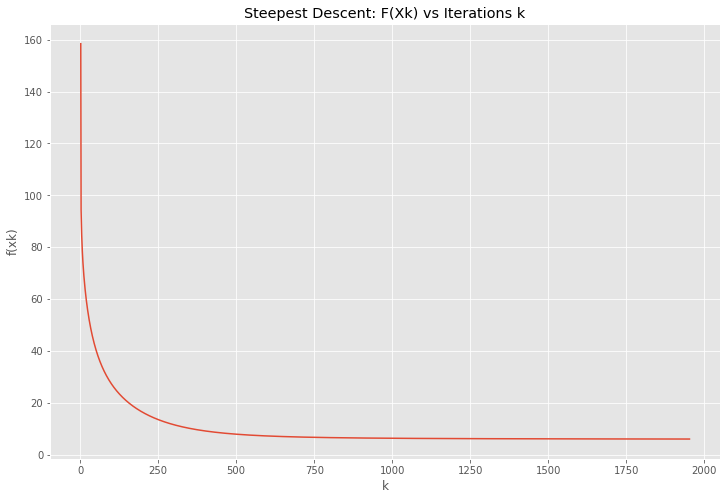

In [59]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('f(xk)')
ax.set_xlabel('k')
_=ax.plot(data["Iteration"], data["FXk"])
plt.title("Steepest Descent: F(Xk) vs Iterations k")
plt.savefig("gd_plot.png", dpi=300, transparent=True)

# Q3) Critical Points of a function (3 marks)

i) Generate a third degree polynomial in x and y named g(x, y) that is based on your mobile number (Note : In case there is a 0 in one of the digits replace it by 3). Suppose your mobile number is 9412821233, then the polynomial would be g(x, y) = 9x3 − 4x2y + 1xy2 − 2y3 + 8x2 − 2xy + y2 − 2x + 3y − 3, where alternate positive and negative sign are used.

                        Deliverable(s) : The polynomial constructed should be reported. (0.5)
                        
-----------------------------------------------------------------------------------------------------------------------

In [253]:
def generate_polynomial(mobile_no="9999111111"):
    modified_mobile_no = ""
    for digit in mobile_no:
        if digit == "0":
            modified_mobile_no = modified_mobile_no + "3"
        else:
            modified_mobile_no = modified_mobile_no + digit
    polys = ["*x**3", "*x**2*y", "*x*y**2", "*y**3", "*x**2", "*x*y", "*y**2", "*x", "*y", ""]
    g_of_x_y = ""
    for digit_idx in range(len(modified_mobile_no)):
        if digit_idx == 0:
            g_of_x_y = modified_mobile_no[digit_idx] + polys[digit_idx]
        else:
            sign = "+" if digit_idx % 2 == 0 else "-"
            g_of_x_y = "{0} {1} {2}{3}".format(g_of_x_y, sign, modified_mobile_no[digit_idx], polys[digit_idx])
    return g_of_x_y

In [254]:
generate_polynomial()

'9*x**3 - 9*x**2*y + 9*x*y**2 - 9*y**3 + 1*x**2 - 1*x*y + 1*y**2 - 1*x + 1*y - 1'

ii) Write a code to find all critical points of g(x, y). You may use built in functions like ’solve’ (or other similar functions) in Octave/Matlab to find the critical points .

                       Deliverable(s) : The code that finds the critical points along with the 
                                  display of all the calculated critical points. (1)
                                  
-----------------------------------------------------------------------------------------------------------------------

##### Not profiecient in Octave/Matlab so using python for this question and as mentioned can use in-built functions like 'solve', using sympy in python which is equivalent

##### Ref: https://www3.nd.edu/~nancy/Math20550/Matlab/Assignments/Optimization/optimization.html
         https://people.duke.edu/~ccc14/sta-663-2016/homework/Homework05_Solutions.html

In [255]:
from sympy import symbols, simplify, diff, solve, Eq, Matrix, det, Function, hessian

In [256]:
def calculate_critical_points(f):
    x, y = symbols('x y')
    
    v = Matrix([x, y])
    f = Matrix([f])
    gradf = simplify(f.jacobian(v))
    hessianf = simplify(hessian(f, v))
    crit = solve(gradf, v)
    return crit, hessianf, v

In [257]:
def run_critical_points_calc():
    f = symbols('f', cls=Function)
    f = simplify(generate_polynomial("9999111111"))
    critical_points, hessianf, v = calculate_critical_points(f)
    for point in critical_points:
        print(f"{point}\n")

In [258]:
run_critical_points_calc()

(-1/6, 1/6)

(1/9, -1/9)

(-47*sqrt(3)/180 - 108*(1/36 + 5*sqrt(3)/36)**2/25 - 23/900 + 1296*(1/36 + 5*sqrt(3)/36)**3/25, 1/36 + 5*sqrt(3)/36)

(1296*(1/36 - 5*sqrt(3)/36)**3/25 - 108*(1/36 - 5*sqrt(3)/36)**2/25 - 23/900 + 47*sqrt(3)/180, 1/36 - 5*sqrt(3)/36)



iii) Write a code to determine whether they correspond to a maximum, minimum or a saddle point.

                     Deliverable(s) : The code that identifies the type of critical points. The 
                     critical points and their type must be presented in the form of the table 
                              generated by code for the above polynomial. (1.5 marks)
                              
-----------------------------------------------------------------------------------------------------------------------

In [259]:
import scipy.linalg as la

In [277]:
def run_critical_points_characterization():
    f = symbols('f', cls=Function)
    f = simplify(generate_polynomial("9999111322"))
    
    critical_points, hessianf, v = calculate_critical_points(f)
    
    for point in critical_points:
        try:
            h = np.array(hessianf.subs(dict(zip(v, point)))).astype('float')
            l,v_ = la.eig(h)
            if(np.all(np.greater(l,np.zeros(2)))):
                print(f"Function has minimum at point: {point}\n")
            elif(np.all(np.less(l,np.zeros(2)))):
                print(f"Function has maximum at point: {point}\n")
            else:
                print(f"Function has saddle at point: {point}\n")
        except TypeError:
            # Skip for the Imaginary points
            pass

In [278]:
run_critical_points_characterization()

Function has minimum at point: (1296*(1/36 - sqrt(86 - sqrt(3289))/36)**3/37 - 108*(1/36 - sqrt(86 - sqrt(3289))/36)**2/37 - 35/1332 + 95*sqrt(86 - sqrt(3289))/1332, 1/36 - sqrt(86 - sqrt(3289))/36)

Function has saddle at point: (1296*(1/36 - sqrt(sqrt(3289) + 86)/36)**3/37 - 108*(1/36 - sqrt(sqrt(3289) + 86)/36)**2/37 - 35/1332 + 95*sqrt(sqrt(3289) + 86)/1332, 1/36 - sqrt(sqrt(3289) + 86)/36)

Function has maximum at point: (-95*sqrt(86 - sqrt(3289))/1332 - 108*(1/36 + sqrt(86 - sqrt(3289))/36)**2/37 - 35/1332 + 1296*(1/36 + sqrt(86 - sqrt(3289))/36)**3/37, 1/36 + sqrt(86 - sqrt(3289))/36)

Function has saddle at point: (-95*sqrt(sqrt(3289) + 86)/1332 - 108*(1/36 + sqrt(sqrt(3289) + 86)/36)**2/37 - 35/1332 + 1296*(1/36 + sqrt(sqrt(3289) + 86)/36)**3/37, 1/36 + sqrt(sqrt(3289) + 86)/36)

